In [2]:
# Image
from IPython import display

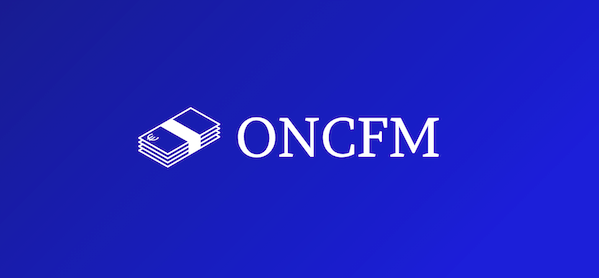

In [3]:
display.Image('./LOGO.png')

# <span style='color:blue'>**kNN**</span>

Méthode de classification supervisée, basée sur la proximité entre les observations des données.

# Librairies

In [4]:
# Librairies traitement des données
import pandas as pd
import numpy as np

#Librairies graphiques
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Librairies d'analyses
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# Warning
import warnings
warnings.filterwarnings('ignore')

# Importation des données

In [5]:
# Importation du fichier csv
billet_knn = pd.read_csv('billet_ad.csv')
# Résultat
billet_knn.head()

,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
# Suppression de la colonne 'Unnamed: 0'
billet_knn = billet_knn.drop(columns={'Unnamed: 0'})
# Résultat
billet_knn.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [7]:
# Dimensions 
billet_knn.shape

(1500, 7)

In [8]:
# Informations
billet_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


# Séparation du jeu de données

Pour la suite de la modélisation, je sépare mon jeu de données en 2 parties. Un jeu de données d'entraînement et un jeu de données test avec respectivement 80% et 20% du jeu de données initial.

In [9]:
# Initialisation de la cible
data = billet_knn[['diagonal','height_left','height_right','margin_low','margin_up','length']]
target = billet_knn['is_genuine']

In [10]:
# Séparation du jeu de données en 80/20
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [11]:
# Comptage des modalités de y dans le jeu d'entraînement
print('Jeu de données d\'entraînement\n',ytrain.value_counts())

Jeu de données d'entraînement
 True     792
False    408
Name: is_genuine, dtype: int64


In [12]:
# Comptage des modalités de y dans le jeu test
print('Jeu de données test\n',ytest.value_counts())

Jeu de données test
 True     208
False     92
Name: is_genuine, dtype: int64


# Choix du classifieur

Pour cette méthode, on doit choisir le nombre de voisins et la distance.

Avant de lancer mon algorithme, je recherche le meilleur classifieur.

Pour trouver l'hyperparamètre k optimal, c'est à dire celui qui avec lequel la prédiction aura le plus faible pourcentage d'erreur, je teste le modèle pour chaque k entre 2 et 15.

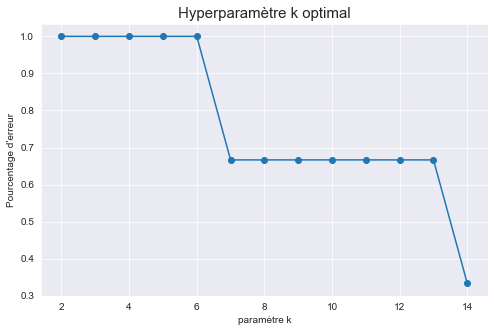

In [13]:
# Visualisation de l'hyperparamètre k
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
# Graphique
plt.figure(figsize=(8,5))
plt.plot(range(2,15), errors, 'o-')
# Titres
plt.xlabel('paramètre k')
plt.ylabel('Pourcentage d\'erreur')
plt.title('Hyperparamètre k optimal', fontsize=15)

plt.show()

In [14]:
# On entre les résultats dans un df
df_knn = pd.DataFrame(errors, range(2,15))
# Résultat
df_knn.head()

,0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Je trie mon df dans l'ordre croissant pour obtenir le classifieur le plus performant.

In [15]:
# Tri dans l'ordre croissant du taux d'erreur
df_knn = df_knn.sort_values(by=0)
# Résultat
df_knn.head()

,0
14,0.333333
7,0.666667
8,0.666667
9,0.666667
10,0.666667


# kNN

In [16]:
# Initialisation de k
k = df_knn.index[0]

In [17]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(k)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=14)

# Prédiction

In [18]:
# Stockage des prédictions dans une nouvelle colonne
xtest['is_genuine'] = knn.predict(xtest)
# Résultat
xtest.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
96,171.57,104.61,103.91,4.49,3.16,113.42,True
508,171.82,104.12,103.95,4.18,3.01,113.47,True
889,172.31,103.94,103.89,4.00,3.20,113.80,True
524,172.09,103.61,103.90,4.58,3.26,112.88,True
754,172.34,104.20,103.69,3.32,3.09,113.44,True


# Performance du modèle

## Matrice de confusion

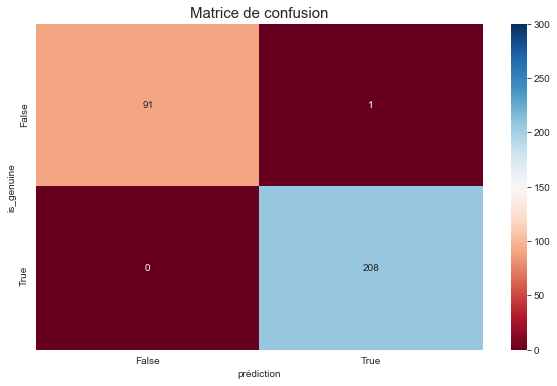

In [19]:
# Matrice de confusion
matrice_confusion = pd.crosstab(ytest,xtest['is_genuine'])
# Résultat avec une heatmap
plt.figure(figsize=(10,6))
sns.heatmap(matrice_confusion, cmap='RdBu', vmin=0, vmax=300, annot=True, fmt='d')
plt.title('Matrice de confusion', fontsize=15)
plt.xlabel('prédiction')
plt.show()

## Evaluation de la performance

In [20]:
# Test de la qualité de prédiction
print(metrics.classification_report(ytest, xtest['is_genuine']))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99        92
        True       1.00      1.00      1.00       208

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



# Intégration du fichier billets_production

## Importation du fichier

In [21]:
# Importation
billets_prodKNN = pd.read_csv('billets_production.csv')
# Résultat
billets_prodKNN

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [22]:
# Dimensions
billets_prodKNN.shape

(5, 7)

In [23]:
# Informations
billets_prodKNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


# Prédiction

In [24]:
# Conservation des variables numériques
billets_prod = billets_prodKNN.select_dtypes(include='float')

In [25]:
# Stockage des prédictions dans une nouvelle colonne
billets_prodKNN['is_genuine'] = knn.predict(billets_prod)

In [26]:
# Stockage des probabilités 
proba_knn = knn.predict_proba(billets_prod)
# Concaténation avec le df de prod
billets_prodKNN = pd.concat([billets_prodKNN, pd.DataFrame(proba_knn*100)], axis=1)
# Résultat
billets_prodKNN

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,0,1
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,100.0,0.0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,100.0,0.0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,100.0,0.0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.0,100.0
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.0,100.0


In [27]:
# Renommage des colonnes 0 et 1
billets_prodKNN = billets_prodKNN.rename(columns={0:'Proba_False(%)',1:'Proba_True(%)'})
# Résultat
billets_prodKNN

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,Proba_False(%),Proba_True(%)
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,100.0,0.0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,100.0,0.0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,100.0,0.0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.0,100.0
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.0,100.0


# Export du df

In [28]:
# Export au format csv
billets_prodKNN.to_csv('billets_prodKNN.csv')

In [31]:
# Fichier billet_test
billets_test = pd.read_csv('billets_test.csv')
# Résultat
billets_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [32]:
billets_test_pred = billets_test.select_dtypes(include='float')

In [33]:
billets_test['is_genuine'] = knn.predict(billets_test_pred)
billets_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,True
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,False
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,True
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,False
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,False
